# WeatherPy
----

#### Analysis
* Tempertures rise the as you get closer to the equator.  
* The northern hemisphere has a wider spread of temperatures vs the southern hemisphere.  This potentially could be a result of spring weather. 
* Humidity, cloudiness, and wind speed are not affected by latitude overall or for either the northern or southern hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime,timedelta
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
#city_id =[]
country=[]
lat=[]
long=[]
temp=[]
clouds=[]
humidity=[]
wind_speed=[]
max_temp=[]
dt=[]



for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ 'imperial'
    weather_response1 = requests.get(query_url)
    weather1_json = weather_response1.json()
    try:
        city_name.append(weather1_json['name'])
        #city_id.append(weather1_json['id'])
        country.append(weather1_json['sys']['country'])
        dt.append(weather1_json['dt'])
        temp.append(weather1_json['main']['temp'])
        max_temp.append(weather1_json['main']['temp_max'])
        lat.append(weather1_json['coord']['lat'])
        long.append(weather1_json['coord']['lon'])
        clouds.append(weather1_json['clouds']['all'])
        humidity.append(weather1_json['main']['humidity'])
        wind_speed.append(weather1_json['wind']['speed'])
        
        print(f"{city}: {weather1_json['id']}")
    except KeyError:
        print(f"{city} is not available")
        

tiksi: 2015306
bisira: 3702269
illoqqortoormiut is not available
shahr-e babak: 115781
hithadhoo: 1282256
yongan: 1806687
vaini: 4032243
koumac: 2140558
upernavik: 3418910
sinnamary: 3380290
ushuaia: 3833367
hermanus: 3366880
champerico: 3598787
bouna: 2290849
mataura: 6201424
urumqi: 1529102
georgetown: 1735106
taolanaro is not available
provideniya: 4031574
rikitea: 4030556
kapaa: 5848280
pevek: 2122090
yellowknife: 6185377
castro: 3466704
busselton: 2075265
buala: 2109528
punta arenas: 3874787
hamilton: 4513583
swan river: 6160362
atuona: 4020109
guerrero negro: 4021858
torbay: 6167817
belogorsk: 2026895
saskylakh: 2017155
bindura: 895061
barmer: 1276901
cape town: 3369157
wewak: 2083537
barentsburg is not available
ribeira grande: 3372707
paamiut: 3421193
bredasdorp: 1015776
attawapiskat is not available
luderitz: 3355672
butaritari: 2110227
hobart: 2163355
kissidougou: 2419472
jamestown: 5122534
carnarvon: 2074865
port-cartier: 6111696
chokurdakh: 2126123
leningradskiy: 2123814
sa

marsaxlokk: 2562247
erenhot: 2037485
kisangani: 212730
coahuayana: 4013679
awjilah: 88533
sioux lookout: 6148373
goure: 2444219
bima: 1648759
lamar: 4705086
husavik: 2629833
shiggaon: 1256539
evanston: 4891382
huazolotitlan is not available
irbil: 95446
rolim de moura is not available
talas: 299900
puerto rondon: 3671337
felidhoo is not available
chitungwiza: 1106542
nikel: 522260
hondo: 1862230
port-de-paix is not available
laguna: 5364271
raymond: 4976361
batemans bay: 2176639
jiddah is not available
karaul is not available
russell: 4047434
varnavino: 476982
san miguel: 3583446
helena: 5656882
great bend: 4272340
cabedelo: 3404558
port harcourt: 2324774
urdzhar is not available
narsaq: 3421719
ixtapa: 4004293
tallahassee: 4174715
ambulu: 1621313
mexico: 1699805
lakes entrance: 2160735
vrangel: 2013258
yerofey pavlovich: 2012938
srednekolymsk: 2121025
yumen: 1528998
nador: 2541479
namibe: 3347019
pauini: 3662927
bocas del toro: 3713959
santa cruz: 3904906
dudingen: 2660970
tahe: 20346

In [4]:
len(max_temp)

554

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict={'City': city_name,
           #'City_id':city_id,
              'Country':country,
              'UTC_dt':dt,
           'Lat': lat,
           'Lng': long,
           'Temperature': temp,
           'Max_temp':max_temp,
           'Cloudiness': clouds,
           'Humidity':humidity,
           'Wind_speed':wind_speed,
             }
weather_dict
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(r'weather_search.csv',index=False)
weather_df

,City,Country,UTC_dt,Lat,Lng,Temperature,Max_temp,Cloudiness,Humidity,Wind_speed
0,Tiksi,RU,1622348567,71.6872,128.8694,35.73,35.73,15,85,9.46
1,Bisira,PA,1622348567,8.5196,-81.7115,60.82,60.82,100,94,2.28
2,Shahr-e Bābak,IR,1622348568,30.1165,55.1186,78.96,78.96,2,13,8.25
3,Hithadhoo,MV,1622348568,-0.6000,73.0833,83.44,83.44,53,72,17.11
4,Yong’an,CN,1622348569,39.6957,113.6871,74.43,74.43,1,33,6.53
...,...,...,...,...,...,...,...,...,...,...
549,Alyangula,AU,1622348779,-13.8483,136.4192,84.07,84.07,60,51,11.45
550,Tadine,NC,1622348779,-21.5500,167.8833,72.63,72.63,100,58,14.27
551,Saint-Leu,RE,1622348780,-21.1500,55.2833,70.95,72.46,0,62,3.96
552,Cairns,AU,1622348780,-16.9167,145.7667,76.53,78.06,90,73,14.97


In [7]:
weather_df.to_html('city_weather.html')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
len(weather_df.loc[weather_df['Humidity']>100])

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

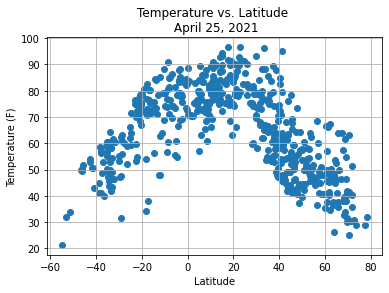

In [9]:
x=weather_df['Lat']
y=weather_df['Temperature']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude \n April 25, 2021")
plt.grid()
plt.savefig('Temp_vs_Lat')
plt.show()

### Analysis
- As expected, tempertures rise the as you get closer to the equator.  The northern hemispere is still in early sprig and therefore has lower temperatures.  (Analysis 4/25)

## Latitude vs. Humidity Plot

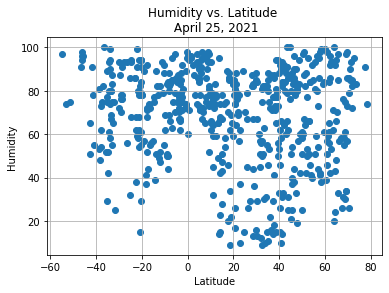

In [10]:
x=weather_df['Lat']
y=weather_df['Humidity']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude \n April 25, 2021")
plt.grid()
plt.savefig('Humidity_vs_Lat')

plt.show()

 ### Analysis
 - Latitude doesn't appear to have an effect on high levels of humidity.  Although lower humidity levels are more prominent in the northern hemisphere, which could be a seasonal effect. (Analysis 4/25)

## Latitude vs. Cloudiness Plot

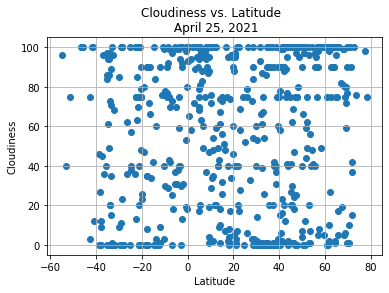

In [11]:
x=weather_df['Lat']
y=weather_df['Cloudiness']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude  \n April 25, 2021")
plt.grid()
plt.savefig('Cloudiness_vs_Lat')
plt.show()

### Analysis
- Latitude doesn't have any affect on cloudiness.  (Analysis 4/25)

## Latitude vs. Wind Speed Plot

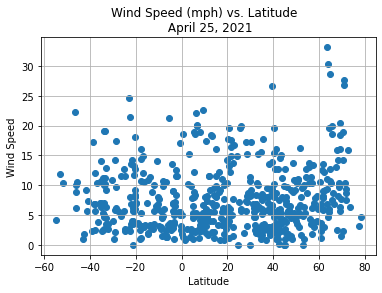

In [12]:
x=weather_df['Lat']
y=weather_df['Wind_speed']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude  \n April 25, 2021")
plt.grid()
plt.savefig('WindSpeed_vs_Lat')
plt.show()

### Analysis
- There doesn't appear to be any relationship between wind speed and latitude. (Analysis 4/25)

## Linear Regression

In [13]:
#create dataframes for North & South for simplier analysis
northern_hem_df = weather_df.loc[weather_df['Lat']>=0]
#northern_hem_df

southern_hem_df = weather_df.loc[weather_df['Lat']<=0]
southern_hem_df

,City,Country,UTC_dt,Lat,Lng,Temperature,Max_temp,Cloudiness,Humidity,Wind_speed
3,Hithadhoo,MV,1622348568,-0.6000,73.0833,83.44,83.44,53,72,17.11
5,Vaini,TO,1622348569,-21.2000,-175.2000,77.16,77.16,75,94,0.00
6,Koumac,NC,1622348569,-20.5667,164.2833,71.85,71.85,79,55,13.22
9,Ushuaia,AR,1622348552,-54.8000,-68.3000,21.29,21.29,96,97,4.16
10,Hermanus,ZA,1622348571,-34.4187,19.2345,48.79,54.90,94,80,5.28
...,...,...,...,...,...,...,...,...,...,...
546,Eirunepé,BR,1622348777,-6.6603,-69.8736,74.08,74.08,97,95,1.41
549,Alyangula,AU,1622348779,-13.8483,136.4192,84.07,84.07,60,51,11.45
550,Tadine,NC,1622348779,-21.5500,167.8833,72.63,72.63,100,58,14.27
551,Saint-Leu,RE,1622348780,-21.1500,55.2833,70.95,72.46,0,62,3.96


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

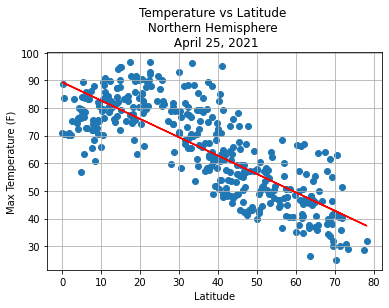

In [14]:
x=northern_hem_df['Lat']
y=northern_hem_df['Max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Temperature vs Latitude \n Northern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
plt.grid()
plt.savefig('Temp_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

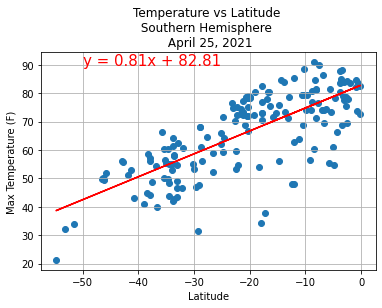

In [15]:
x=southern_hem_df['Lat']
y=southern_hem_df['Max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Temperature vs Latitude \n Southern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.grid()
plt.savefig('Temp_vs_Lat_SouthernHem')
plt.show()

### Analysis
- As stated above, latitude has a directly correlated to temperatures.  The closer you are to the equator, the higher the temperatures.  This is evidenced with the regression line for both the northern and southern hemispheres graphs. (Analysis 4/25)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

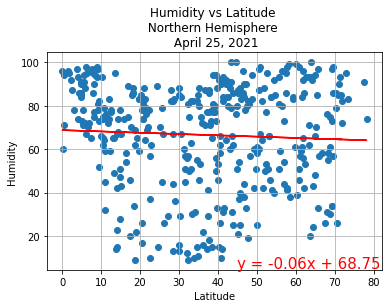

In [16]:
x=northern_hem_df['Lat']
y=northern_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Northern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(45,5),fontsize=15,color='red')
plt.grid()
plt.savefig('Humidity_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

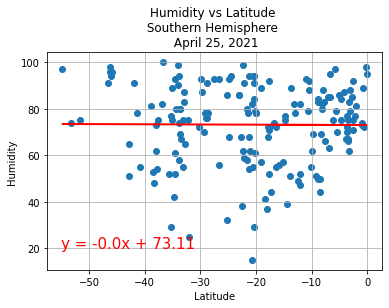

In [17]:
x=southern_hem_df['Lat']
y=southern_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Southern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.grid()
plt.savefig('Humidity_vs_Lat_SouthernHem')
plt.show()

### Analysis
- Latitude no affect on humidity for either the northern or southern hemisphere.  This is confirmed with the respective low r-values, northern (0.11) and southern (0.3).  (Analysis 4/25)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

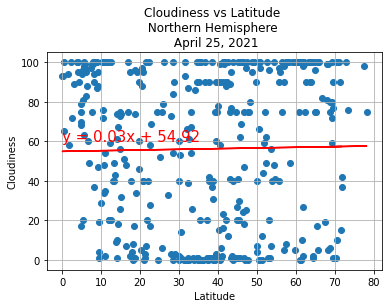

Linear regression: y = 0.03x + 54.92


In [18]:
x=northern_hem_df['Lat']
y=northern_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Northern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(0,60),fontsize=15,color='red')
plt.grid()
plt.savefig('Cloudiness_vs_Lat_NorthernHem')
plt.show()

print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

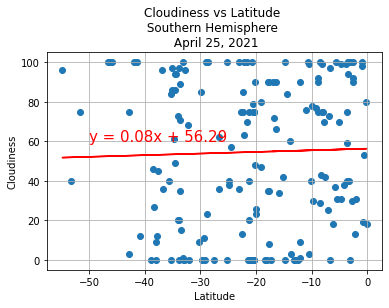

Linear regression: y = 0.08x + 56.29


In [19]:
x=southern_hem_df['Lat']
y=southern_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Southern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(-50,60),fontsize=15,color='red')
plt.grid()
plt.savefig('Cloudiness_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

### Analysis
Latitude no affect on cloudiness for either the northern or southern hemisphere. This is confirmed with the respective low r-values, northern (0.34) and southern (0.58).  The northern hemisphere's higher r-value may be due to seasonality as it is early spring.  (Analysis 4/25)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

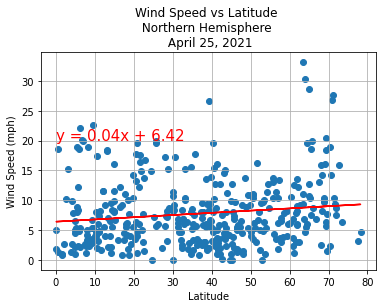

Linear regression: y = 0.04x + 6.42


In [20]:
x=northern_hem_df['Lat']
y=northern_hem_df['Wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Northern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(0,20),fontsize=15,color='red')
plt.grid()
plt.savefig('WindSpeed_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

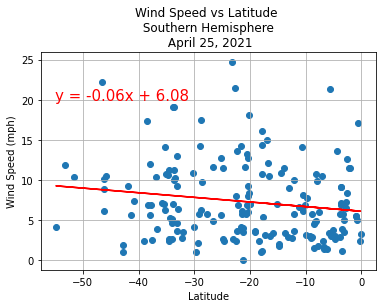

Linear regression: y = -0.06x + 6.08


In [21]:
x=southern_hem_df['Lat']
y=southern_hem_df['Wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Southern Hemisphere \n April 25, 2021")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.grid()
plt.savefig('WindSpeed_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

### Analysis
Wind speed is not related to latitude.   This is confirmed with the respective low r-values, northern (0.05) and southern (0.07). (Analysis 4/25)